In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [20]:
#read data with pandas library
data=pd.read_excel("dataset.xlsx")
data


,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667
3,android-permission-handler-master,1,1,1,6,0.0,2.1,0.083333,1.000000,4.250000,18.757143,3.385714,3.019608,2.333333,8.833333,3.314286,1.666667
4,Android-WhatsApp-master,0,6,0,253,3.4,4.2,0.036145,2.843373,2.120482,46.416898,16.549861,7.336918,5.704301,10.913580,11.076696,0.903614
5,android-youtubeExtractor-master,4,18,7,100,3.8,3.1,0.200000,1.880000,6.720000,43.434783,2.920290,3.908163,5.020408,18.826090,8.260870,1.840000
6,androidtv-sample-inputs-master,15,3,0,155,3.0,1.0,0.241935,2.491935,8.120968,36.534765,11.452965,3.972868,4.281654,23.250000,5.811861,1.580645
7,BirthdayBuddy-master,1,0,0,69,1.0,0.2,0.000000,0.000000,0.000000,52.708333,1.708333,0.000000,0.000000,0.000000,0.000000,0.000000
8,dex2jar,34,306,43,2000,10.1,1.7,0.500824,3.654036,7.975288,41.952099,5.579882,5.454865,4.075811,17.238180,9.152676,1.507414
9,epubator-master,0,12,8,134,0.0,3.0,0.255319,2.180851,6.063830,19.005579,2.112971,2.749027,3.050584,16.319150,3.418410,1.127660


In [22]:
data.head(3) #First 3 samples of the our dataset

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


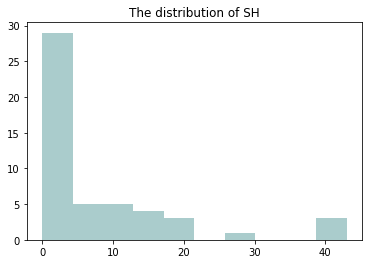

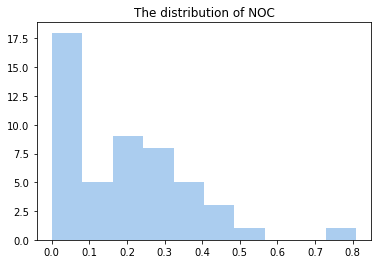

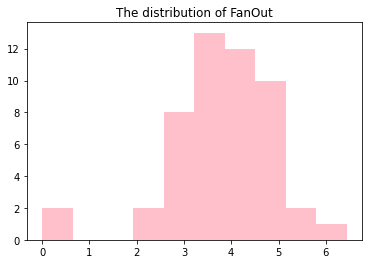

In [21]:
#show the distribution of 3 metrics
def plotHist(columnName,colorName):

    #write your code here
    plt.hist(data[columnName],color=colorName,)
    plt.title("The distribution of "+columnName)
    plt.show()
plotHist("SH","#aacccc")
plotHist("NOC","#abcdef")
plotHist("FanOut","pink")

In [23]:
#Min max scaler for all data
TD=["CDR","TD"]
external=["NOB","V","SH","CS"]
internal=["NOC","CBO","RFC","LOC","CLOC","FanIn","FanOut","LCOM","WMC","DIT"]
columns=list(data.columns.values)
columns.remove("Name")
x=data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(x)
df=pd.DataFrame(X_train_minmax,columns=columns)
df






,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
1,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
2,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
3,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
4,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032
5,0.036364,0.058824,0.162791,0.0500,0.191919,0.254098,0.247059,0.514500,0.279926,0.755345,0.176454,0.532671,0.779704,0.427866,0.745788,0.845116
6,0.136364,0.009804,0.000000,0.0775,0.151515,0.081967,0.298861,0.681968,0.338284,0.573309,0.692028,0.541490,0.664970,0.528409,0.524693,0.725994
7,0.009091,0.000000,0.000000,0.0345,0.050505,0.016393,0.000000,0.000000,0.000000,1.000000,0.103223,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.309091,1.000000,1.000000,1.0000,0.510101,0.139344,0.618665,1.000000,0.332216,0.716229,0.337156,0.743482,0.633001,0.391777,0.826300,0.692359
9,0.000000,0.039216,0.186047,0.0670,0.000000,0.245902,0.315394,0.596833,0.252593,0.110854,0.127673,0.374684,0.473776,0.370890,0.308613,0.517937


# Part1 (Statistical Correlation Analysis)

In [24]:
#Show the correlation matrix of all metrics

data.corr(method="spearman")

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [27]:
#P values of Spearman Correlation Table
import scipy.stats


corr,pval=scipy.stats.spearmanr(data[columns])
pval=pd.DataFrame(pval,columns=columns,index=columns)
list1=np.array(pval.round(5))
for i in range(0,len(list1)):
    for j in range(0,len(list1)):
        if i==j and list1[i][j]==0.0000e+00:
            list1[i][j]=1
pvals=pd.DataFrame(list1,columns=columns,index=columns)
pvals.round(4)

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,1.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,1.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2789,0.9116,0.0129,0.4566
CS,0.0000,0.0000,0.0000,1.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0008,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,1.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,1.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9058,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,1.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,1.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4482,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,1.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,1.0000,0.3807,0.0000,0.0000,0.6516,0.0000,0.2082


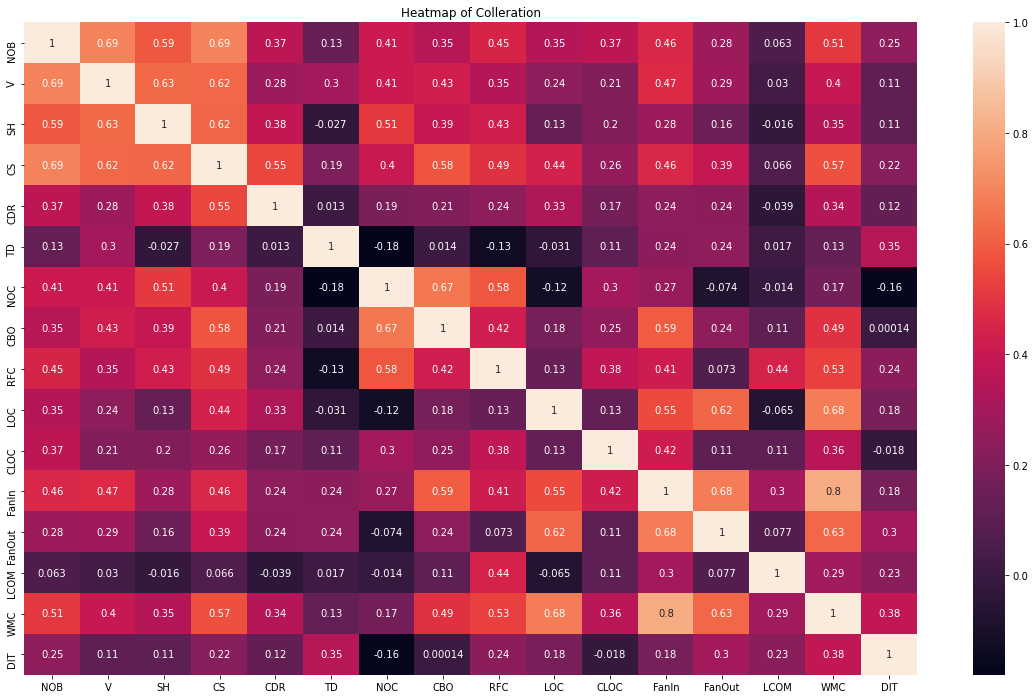

In [26]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(method="spearman"),annot=True)
plt.title("Heatmap of Colleration")
plt.show()

In [28]:
#Correlation between External Metrics & TD


dd=data[TD+external]
dd.corr(method="spearman")


,CDR,TD,NOB,V,SH,CS
CDR,1.000000,0.013400,0.373251,0.280358,0.384657,0.548113
TD,0.013400,1.000000,0.133383,0.296757,-0.026546,0.194611
NOB,0.373251,0.133383,1.000000,0.694733,0.587592,0.691274
V,0.280358,0.296757,0.694733,1.000000,0.629663,0.624194
SH,0.384657,-0.026546,0.587592,0.629663,1.000000,0.618509
CS,0.548113,0.194611,0.691274,0.624194,0.618509,1.000000


In [29]:
#Correlation between Internal Metrics & TD
ds=data[TD+internal]
ds.corr(method="spearman")

,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
CDR,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072
CLOC,0.171773,0.114297,0.297347,0.250408,0.381636,0.126681,1.000000,0.416789,0.109636,0.107619,0.355080,-0.017867
FanIn,0.243709,0.239077,0.268289,0.594578,0.414878,0.554326,0.416789,1.000000,0.679297,0.296355,0.802910,0.179395
FanOut,0.237237,0.240135,-0.074350,0.240953,0.072564,0.618676,0.109636,0.679297,1.000000,0.076982,0.626327,0.295389
LCOM,-0.038683,0.017159,-0.013518,0.109694,0.444076,-0.065455,0.107619,0.296355,0.076982,1.000000,0.291312,0.229251


# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn import linear_model
random_state_fixed=53

#This function plots graphs to improve visual confirmation



#Linear Regressor is one of the best choice for the data that is correlated linearly:

def linearRegression(x_train,y_train,x_test,y_test,name):
     # Create the regressor: reg_all
    model=linear_model.LinearRegression()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    plt.scatter(y_test,y_pred,label="Predicted Values")
    plt.scatter(y_test,y_test,label="Original Values")
    plt.legend()
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2=r2_score(y_test, y_pred)
    txt1=" Linear Regression- R-Squared Value :"+str(r2)
    txt2=" Linear Regression- Root Mean Squared Error :"+str(rmse)
    if name=="TD":
        plt.title(txt1+"\n"+txt2+"\n"+"\n"+"Accuracy of Linear Regressor for TD")
    elif name=="CDR":
        plt.title(txt1+"\n"+txt2+"\n"+"\n"+"Accuracy of Linear Regressor  for CDR")
    plt.show()



#SVR is also one of the most common regressor that used for regression predictions
def svrRegression(x_train,y_train,x_test,y_test,name):
    classifier=svm.SVR(kernel="linear")
    classifier.fit(x_train, y_train)
    y_pred=classifier.predict(x_test)
    plt.scatter(y_test,y_pred,label="Predicted Values")
    plt.scatter(y_test,y_test,label="Original Values")
    plt.legend()
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2=r2_score(y_test, y_pred)
    txt1=" Linear kernel- R-Squared Value :"+str(r2)
    txt2=" Linear kernel- Root Mean Squared Error :"+str(rmse)
    if name=="TD":
        plt.title(txt1+"\n"+txt2+"\n"+"\n"+"Accuracy of SVR Regressor-linear Kernel for TD")
    elif name=="CDR":
        plt.title(txt1+"\n"+txt2+"\n"+"\n"+"Accuracy of SVR Regressor-linear  Kernel for CDR")
    plt.show()
    classifier=svm.SVR(kernel="rbf")
    classifier.fit(x_train, y_train)
    y_pred=classifier.predict(x_test)
    plt.scatter(y_test,y_pred,label="Predicted Values")
    plt.scatter(y_test,y_test,label="Original Values")
    plt.legend()
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2=r2_score(y_test, y_pred)
    txt1=" RBF kernel- R-Squared Value :"+str(r2)
    txt2=" RBF kernel- Root Mean Squared Error :"+str(rmse)
    if name=="TD":
        plt.title(txt1+"\n"+txt2+"\n"+"\n"+"Accuracy of SVR Regressor-RBF Kernel for TD")
    elif name=="CDR":
        plt.title(txt1+"\n"+txt2+"\n"+"\n"+"Accuracy of SVR Regressor-RBF Kernel for CDR")
    plt.show()
  



def decisionTreeRegression(x_train,y_train,x_test,y_test,name):
    dtreg=DecisionTreeRegressor(random_state=53)
    dtreg.fit(x_train,y_train)
    y_pred=dtreg.predict(x_test)
    plt.scatter(y_test,y_pred,label="Predicted Values")
    plt.scatter(y_test,y_test,label="Original Values")
    plt.legend()
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2=r2_score(y_test, y_pred)
    txt1=" Decision Tree Regression- R-Squared Value :"+str(r2)
    txt2=" Decision Tree Regression- Root Mean Squared Error :"+str(rmse)
    if name=="TD":
        plt.title(txt1+"\n"+txt2+"\n"+"\n"+"Accuracy of Decision Tree Regressor for TD")
    elif name=="CDR":
        plt.title(txt1+"\n"+txt2+"\n"+"\n"+"Accuracy of Decision Tree Regressor  for CDR")
    plt.show()
  



def randomDecTreeRegression(x_train,y_train,x_test,y_test,name):
    rdtreg=RandomForestRegressor(random_state=53)
    rdtreg.fit(x_train,y_train)
    y_pred=rdtreg.predict(x_test)
    plt.scatter(y_test,y_pred,label="Predicted Values")
    plt.scatter(y_test,y_test,label="Original Values")
    plt.legend()
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2=r2_score(y_test, y_pred)
    txt1=" Random Decision Tree Regression- R-Squared Value :"+str(r2)
    txt2=" Random Decision Tree Regression- Root Mean Squared Error :"+str(rmse)
    if name=="TD":
        plt.title(txt1+"\n"+txt2+"\n"+"\n"+"Accuracy of Random Decision Tree Regressor for TD")
    elif name=="CDR":
        plt.title(txt1+"\n"+txt2+"\n"+"\n"+"Accuracy of Random Decision Tree Regressor  for CDR")
    plt.show()
  



#Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
def  mlpRegressor(x_train,y_train,x_test,y_test,name):
    mlpreg=MLPRegressor(random_state=53)
    mlpreg.fit(x_train,y_train)
    y_pred=mlpreg.predict(x_test)
    plt.scatter(y_test,y_pred,label="Predicted Values")
    plt.scatter(y_test,y_test,label="Original Values")
    plt.legend()
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2=r2_score(y_test, y_pred)
    txt1="  Multi-layer Perceptron Regression- R-Squared Value :"+str(r2)
    txt2="  Multi-layer Perceptron Regression- Root Mean Squared Error :"+str(rmse)
    if name=="TD":
        plt.title(txt1+"\n"+txt2+"\n"+"\n"+"Accuracy of Multi-layer Perceptron Regressor for TD")
    elif name=="CDR":
        plt.title(txt1+"\n"+txt2+"\n"+"\n"+"Accuracy of Multi-layer Perceptron Regressor  for CDR")
    plt.show()



In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [31]:
#split data into train and test data
x_train, x_test = train_test_split(df[internal],test_size=0.3,random_state=53)
td_train,td_test = train_test_split(df["TD"],test_size=0.3,random_state=53)
cdr_train, cdr_test = train_test_split(df["CDR"],test_size=0.3,random_state=53)

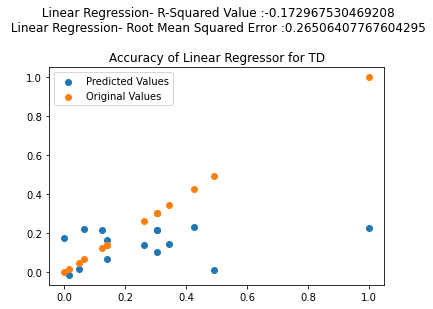

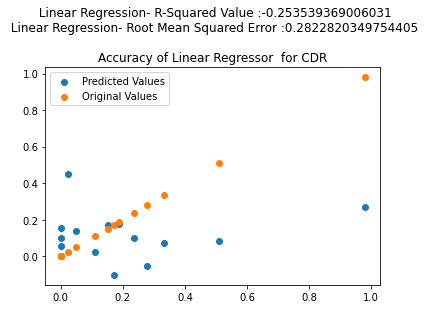

In [32]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(x_train,td_train,x_test,td_test,"TD")
linearRegression(x_train,cdr_train,x_test,cdr_test,"CDR")

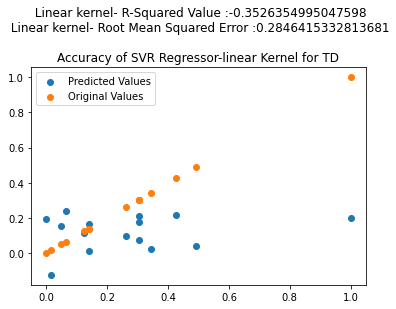

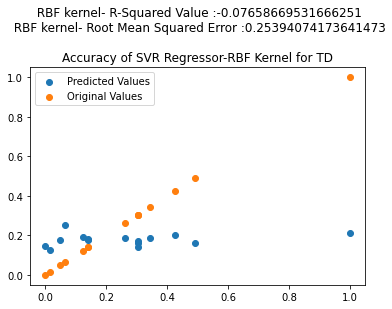

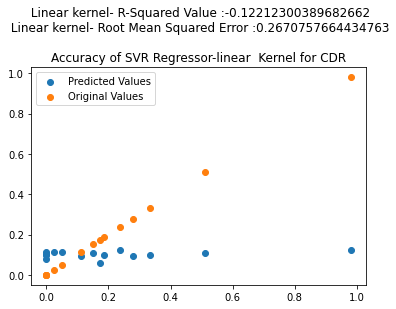

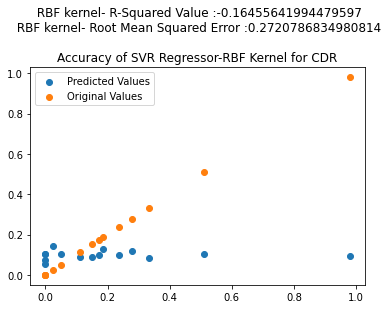

In [33]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
svrRegression(x_train,td_train,x_test,td_test,"TD")
svrRegression(x_train,cdr_train,x_test,cdr_test,"CDR")


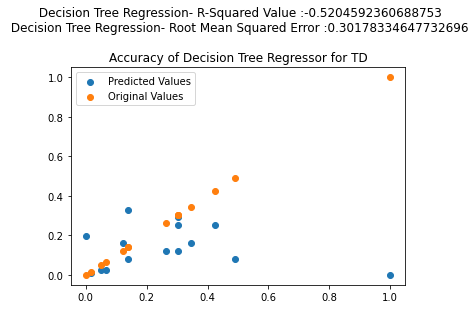

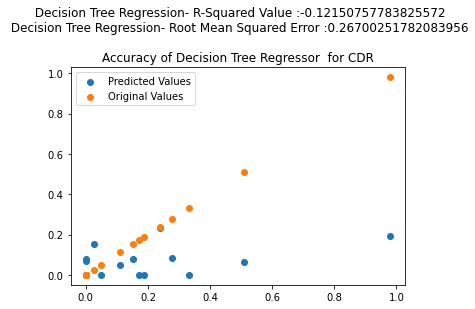

In [34]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error)
decisionTreeRegression(x_train,td_train,x_test,td_test,"TD")
decisionTreeRegression(x_train,cdr_train,x_test,cdr_test,"CDR")

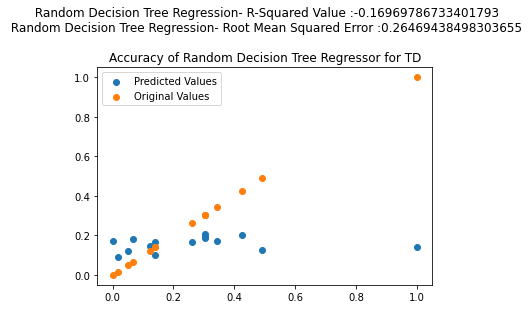

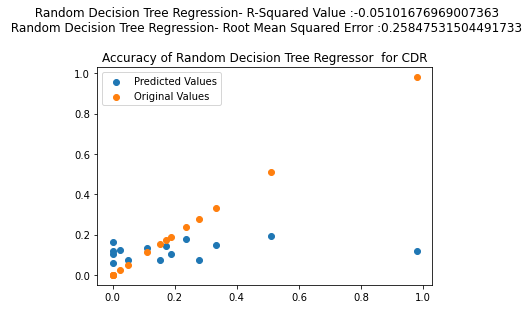

In [35]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

randomDecTreeRegression(x_train,td_train,x_test,td_test,"TD")
randomDecTreeRegression(x_train,cdr_train,x_test,cdr_test,"CDR")

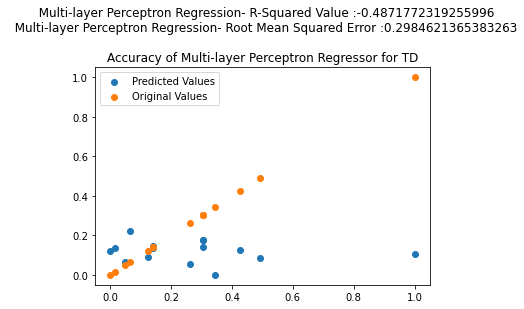

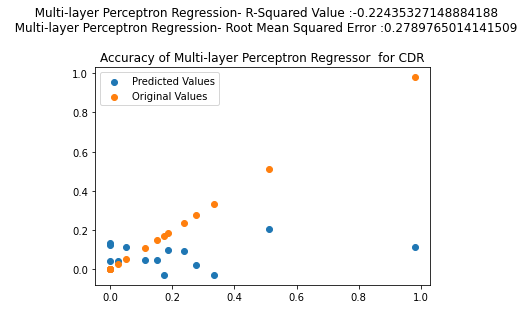

In [36]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )

mlpRegressor(x_train,td_train,x_test,td_test,"TD")
mlpRegressor(x_train,cdr_train,x_test,cdr_test,"CDR")

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [37]:
#split data into train and test data
xe_train, xe_test = train_test_split(df[external],test_size=0.3,random_state=53)
td_train,td_test = train_test_split(df["TD"],test_size=0.3,random_state=53)
cdr_train, cdr_test = train_test_split(df["CDR"],test_size=0.3,random_state=53)

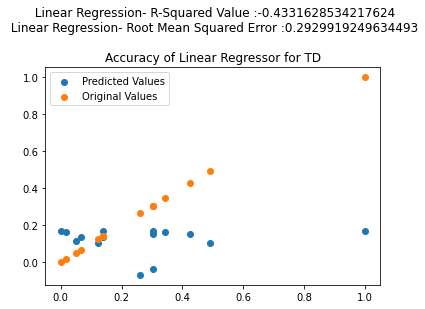

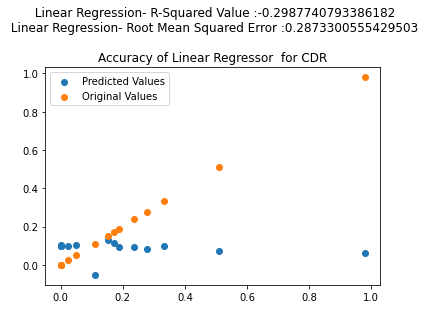

In [38]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(xe_train,td_train,xe_test,td_test,"TD")
linearRegression(xe_train,cdr_train,xe_test,cdr_test,"CDR")

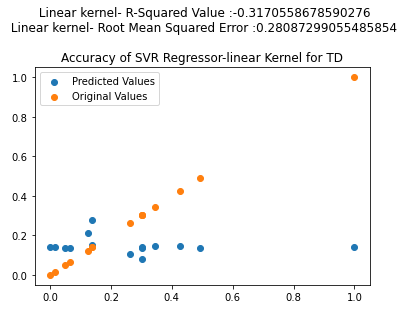

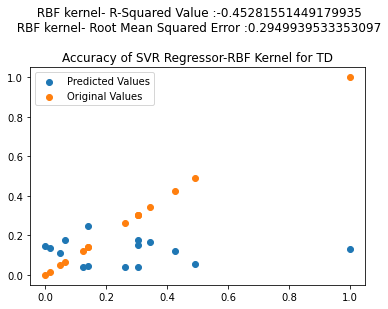

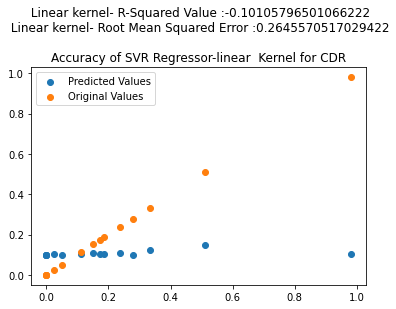

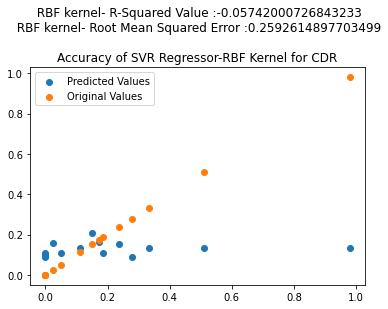

In [39]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
svrRegression(xe_train,td_train,xe_test,td_test,"TD")
svrRegression(xe_train,cdr_train,xe_test,cdr_test,"CDR")

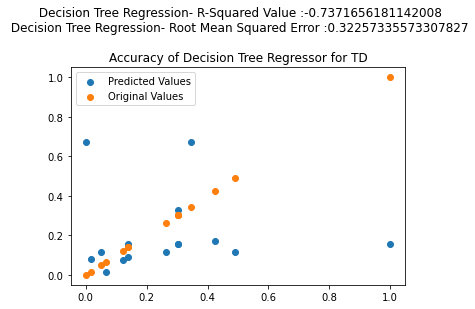

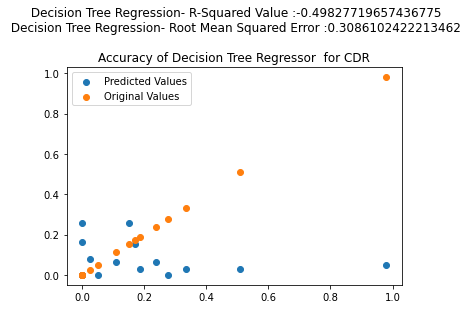

In [43]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(xe_train,td_train,xe_test,td_test,"TD")
decisionTreeRegression(xe_train,cdr_train,xe_test,cdr_test,"CDR")

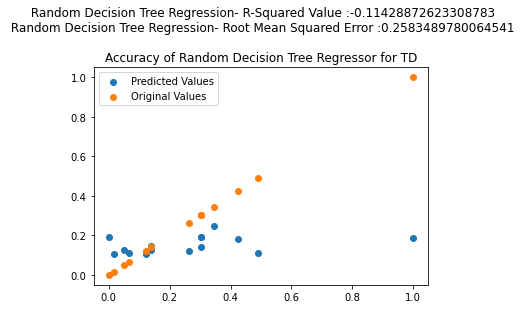

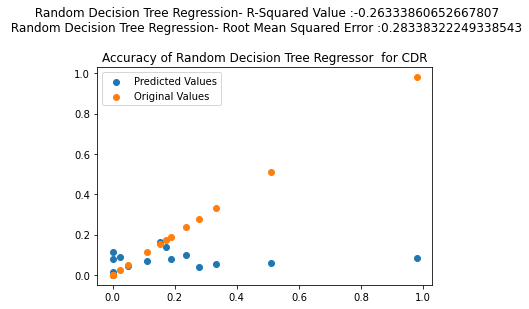

In [45]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(xe_train,td_train,xe_test,td_test,"TD")
randomDecTreeRegression(xe_train,cdr_train,xe_test,cdr_test,"CDR")

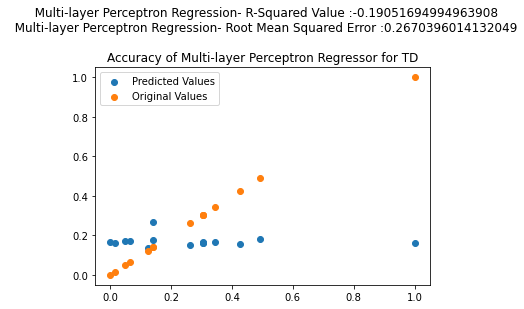

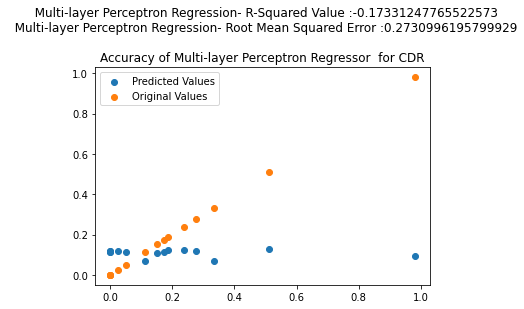

In [48]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(xe_train,td_train,xe_test,td_test,"TD")
mlpRegressor(xe_train,cdr_train,xe_test,cdr_test,"CDR")

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [49]:
#split data into train and test data
xie_train, xie_test = train_test_split(df[external+internal],test_size=0.3,random_state=53)
td_train,td_test = train_test_split(df["TD"],test_size=0.3,random_state=53)
cdr_train, cdr_test = train_test_split(df["CDR"],test_size=0.3,random_state=53)

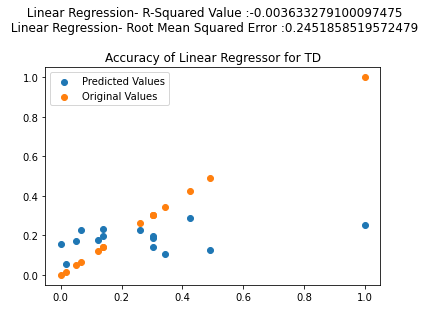

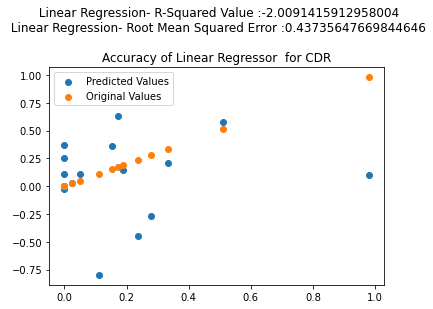

In [50]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(xie_train,td_train,xie_test,td_test,"TD")
linearRegression(xie_train,cdr_train,xie_test,cdr_test,"CDR")

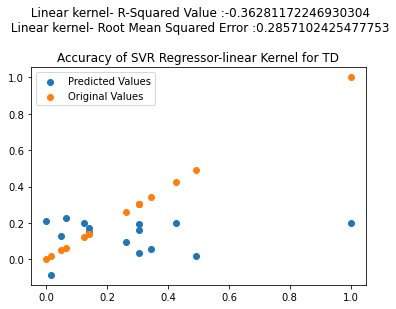

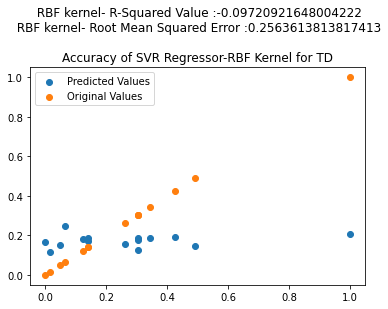

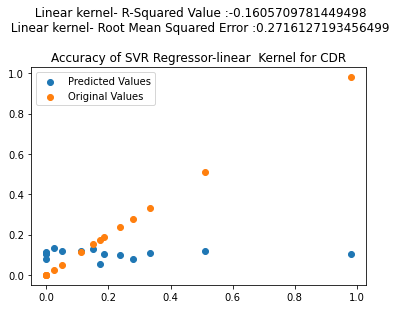

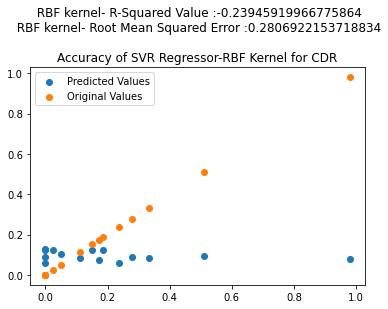

In [51]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
svrRegression(xie_train,td_train,xie_test,td_test,"TD")
svrRegression(xie_train,cdr_train,xie_test,cdr_test,"CDR")

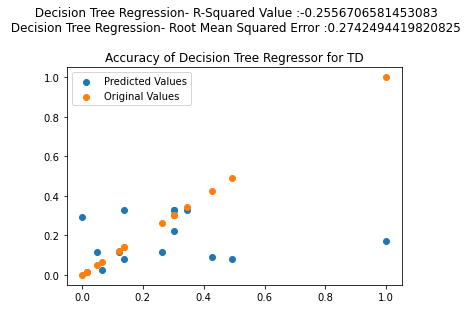

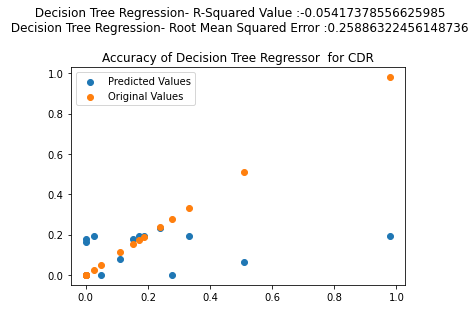

In [52]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(xie_train,td_train,xie_test,td_test,"TD")
decisionTreeRegression(xie_train,cdr_train,xie_test,cdr_test,"CDR")

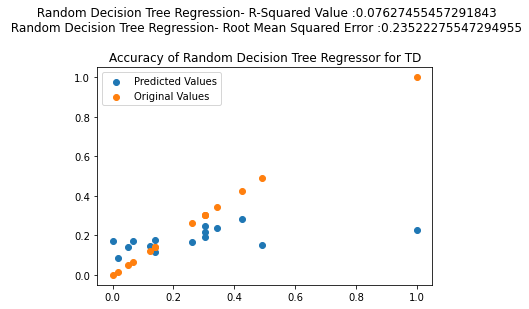

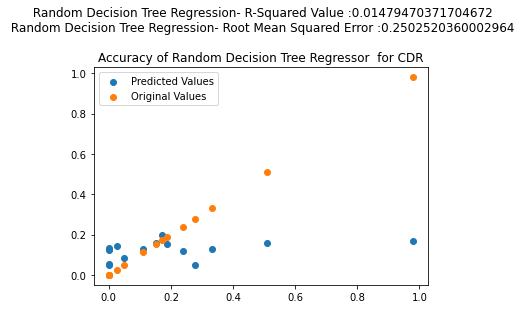

In [54]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(xie_train,td_train,xie_test,td_test,"TD")
randomDecTreeRegression(xie_train,cdr_train,xie_test,cdr_test,"CDR")

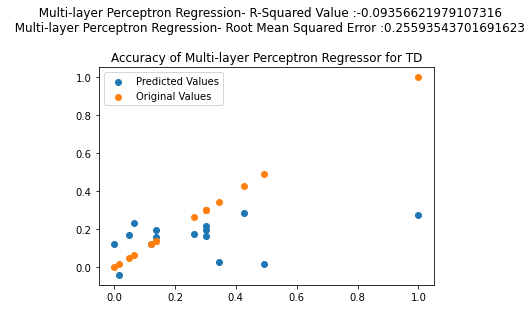

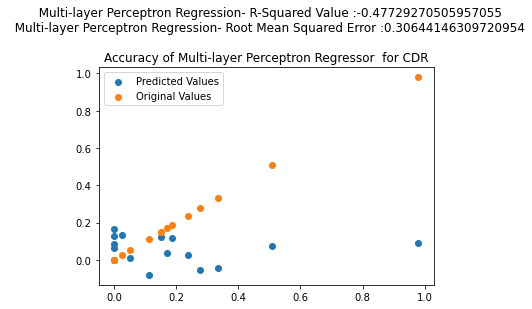

In [57]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(xie_train,td_train,xie_test,td_test,"TD")
mlpRegressor(xie_train,cdr_train,xie_test,cdr_test,"CDR")